<a href="https://colab.research.google.com/github/Kevin-Yau/CHL5230/blob/main/Datathon_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('mhealth.csv')

In [ ]:
# read dataset
wear_df = pd.read_csv('mhealth.csv')
wear_df.head()

# check dimension of the dataset
print(wear_df.shape)

# list the columns of the dataframe
print(wear_df.columns)



(999999, 14)
Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')


In [ ]:
wear_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [ ]:
# Group the dataset by the 'subject' column and apply the `len` function
# to each group. This counts the number of records for each patient.
# The result is a series where the index is 'subject' and the value is the count of records.
patients_with_2_or_more_records = (wear_df.groupby('subject').apply(len) >= 2)


In [ ]:

# Filter the original dataset to include only those patients who have 2 or more records.
# This is done by first creating a boolean series `patients_with_2_or_more_records` where the index is 'patient_nbr'
# and the value is True if the patient has 2 or more records, False otherwise.
# Then, using `isin` method to filter `Mobile Health Data` so that it only includes rows where 'subject'
# matches those in the `patients_with_2_or_more_records` series that are True.
patients_with_2_or_more_records_df = wear_df[wear_df['subject'].isin(patients_with_2_or_more_records[patients_with_2_or_more_records].index)]

In [ ]:
# Update the original 'wear_df' dataframe with the filtered dataframe.
# This step replaces the original dataset with the subset of patients who have 2 or more records.
wear_df = patients_with_2_or_more_records_df

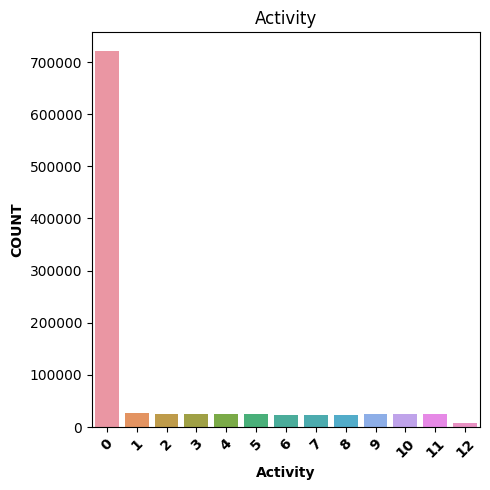

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Activity Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=wear_df)
plt.title('Activity')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

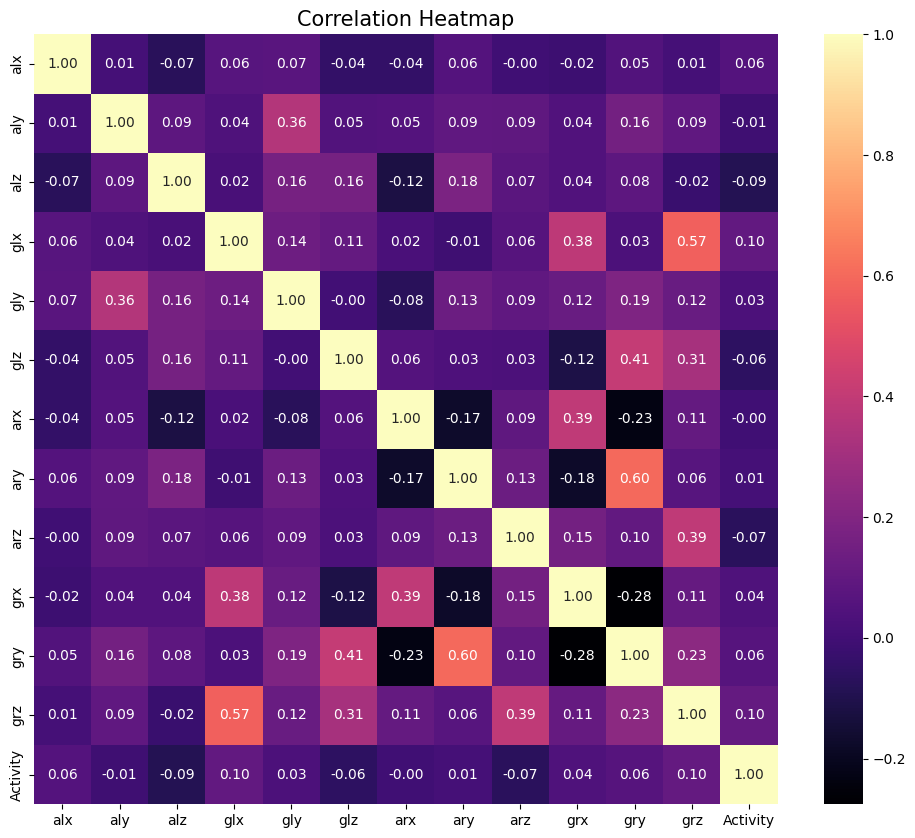

In [ ]:
import numpy as np

# For the correlation heatmap, we'll use only numerical columns.
# We'll update the list of numerical features to exclude columns with '_id' in their names.
numerical_features = [
    col for col in wear_df.select_dtypes(include=[np.number]).columns
    if not col.endswith('_id')
]

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = wear_df[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

<Axes: >

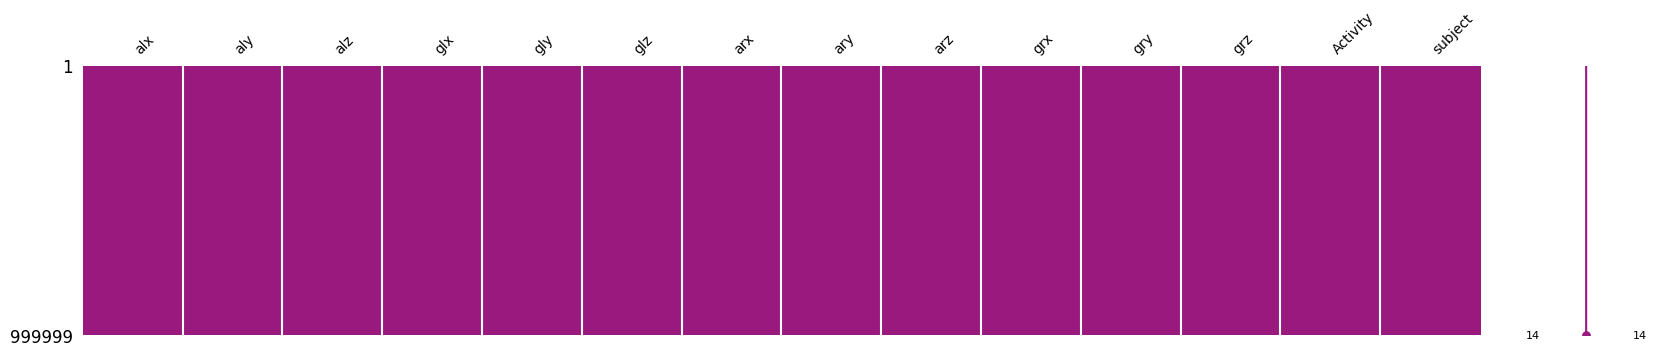

In [ ]:
# !pip install missingno
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(wear_df, figsize=(20,3.5), fontsize=10, color=(.6,.1,0.5))

In [ ]:
#Encoding Categorical Data - We don't really need to do this step

# Identifying categorical columns excluding 'readmitted'
categorical_columns = wear_df.select_dtypes(include=['object']).columns.tolist()

# Applying one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(wear_df, columns=categorical_columns)

# Displaying the shape of the new dataframe
df_encoded_shape = df_encoded.shape
df_encoded_shape


(75468, 14)

In [ ]:
from sklearn.model_selection import train_test_split

# Grouping by 'subject' and creating a list of dataframes, one per group
grouped = wear_df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((740414, 14), (259585, 14))

In [ ]:
#Updated Normalization Step
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding 'subject' and 'Activity')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['subject', 'Activity']]

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,0,subject6
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,0,subject6
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,0,subject6
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,0,subject6
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,0,subject6


In [ ]:
#Normalization Step - should not be normalizing the patient ID

from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding 'subject'')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64','object']).columns.tolist()
numerical_columns.remove('subject')
numerical_columns.remove('Activity')
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,0,subject6
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,0,subject6
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,0,subject6
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,0,subject6
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,0,subject6


In [ ]:
class_distribution = train_df['Activity'].value_counts()
print(class_distribution)

0     530225
1      21504
2      19262
3      18432
4      18432
9      18432
10     18432
11     18432
5      18432
6      17665
8      17511
7      17460
12      6195
Name: Activity, dtype: int64


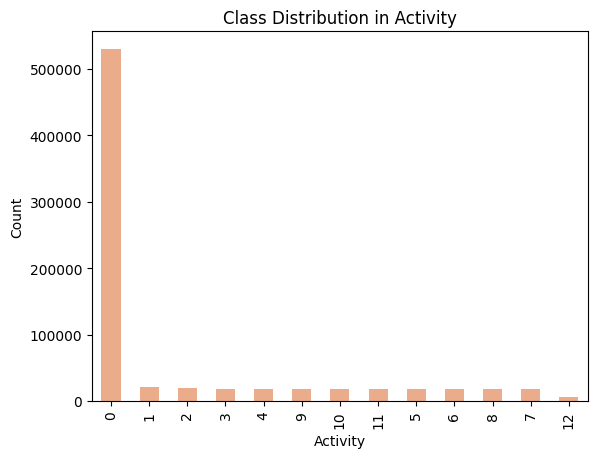

In [ ]:
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.title('Class Distribution in Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

Subject subject1 Class Distribution:
subject   Activity
subject1  0           126106
          8             3379
          1             3072
          2             3072
          3             3072
          4             3072
          5             3072
          6             3072
          7             3072
          9             3072
          10            3072
          11            3072
          12            1075
Name: Activity, dtype: int64



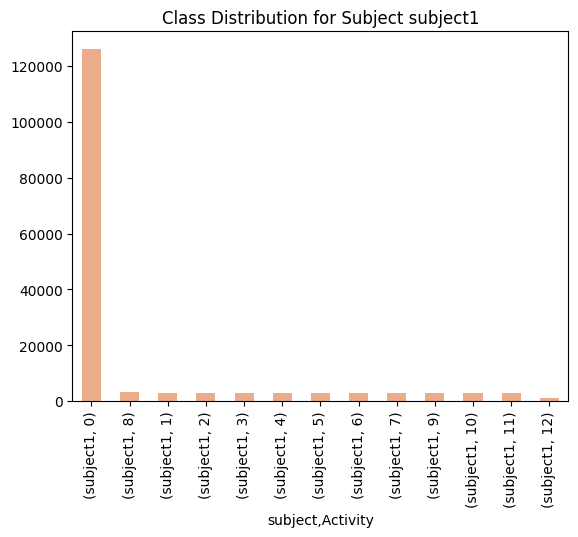

Subject subject3 Class Distribution:
subject   Activity
subject3  0           86732
          7            3379
          6            3226
          8            3175
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
          12           1024
Name: Activity, dtype: int64



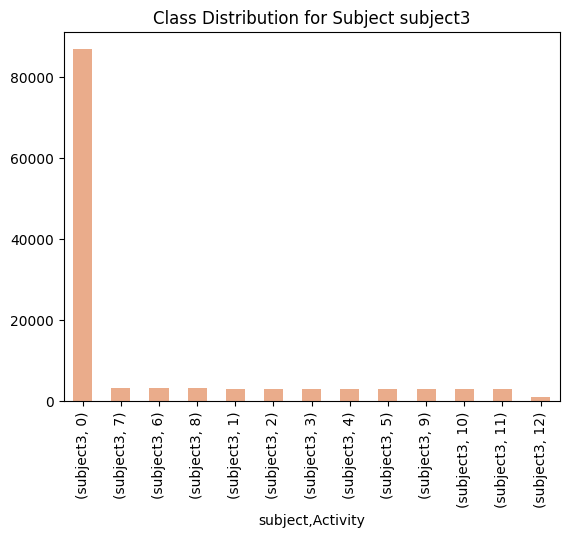

Subject subject4 Class Distribution:
subject   Activity
subject4  0           81408
          6            3328
          7            3277
          8            3123
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
          12           1024
Name: Activity, dtype: int64



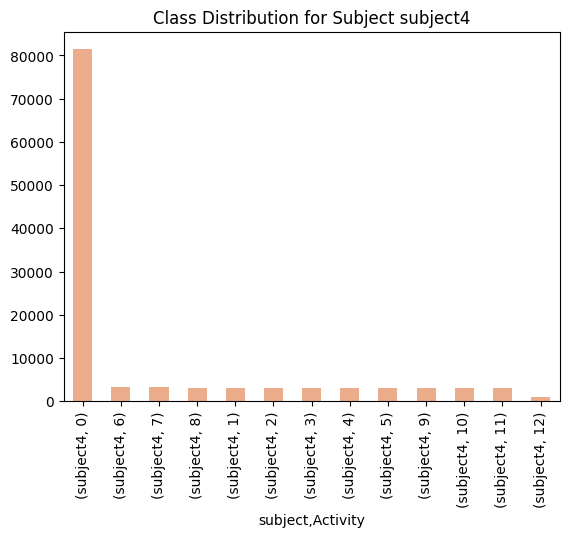

Subject subject5 Class Distribution:
subject   Activity
subject5  0           85861
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
          7            2868
          6            2765
          8            2714
          12           1024
Name: Activity, dtype: int64



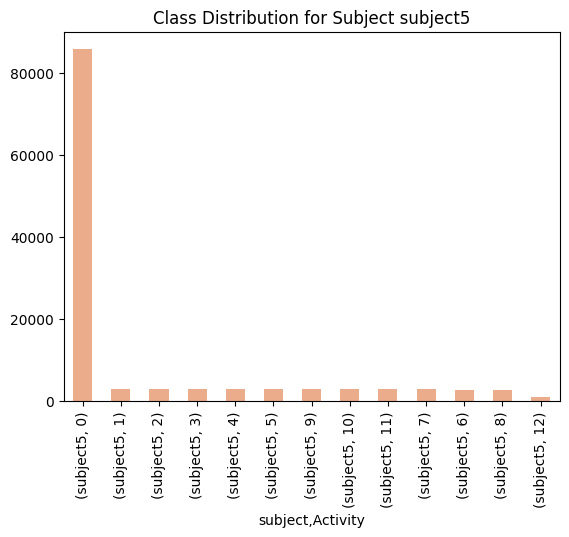

Subject subject6 Class Distribution:
subject   Activity
subject6  0           66099
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
          8            2304
          6            2202
          7            2099
          12           1024
Name: Activity, dtype: int64



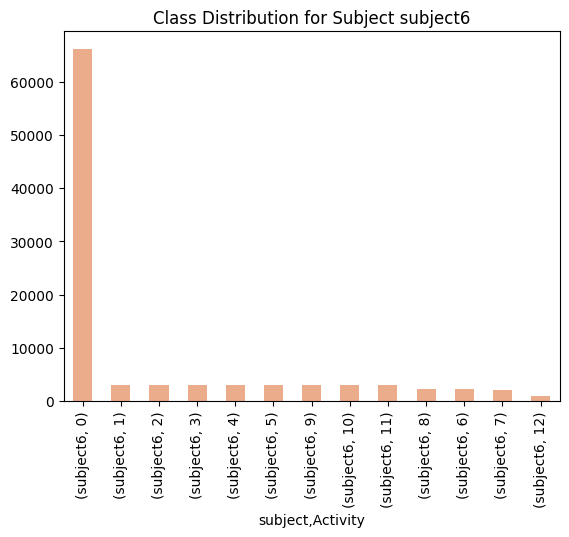

Subject subject7 Class Distribution:
subject   Activity
subject7  0           70195
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          6            3072
          9            3072
          10           3072
          11           3072
          8            2816
          7            2765
          12           1024
Name: Activity, dtype: int64



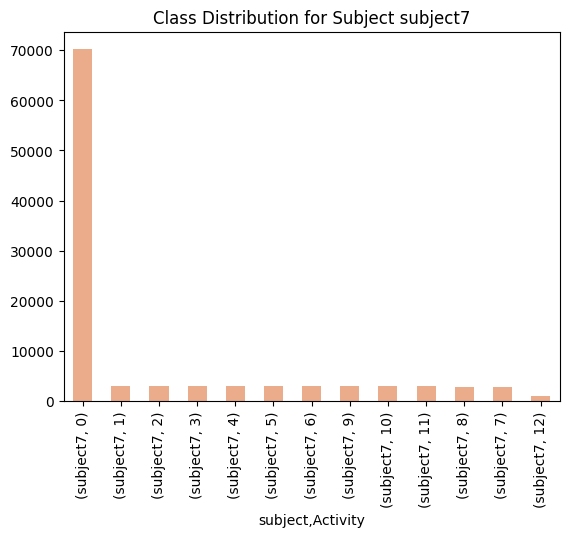

Subject subject9 Class Distribution:
subject   Activity
subject9  0           13824
          1            3072
          2             830
Name: Activity, dtype: int64



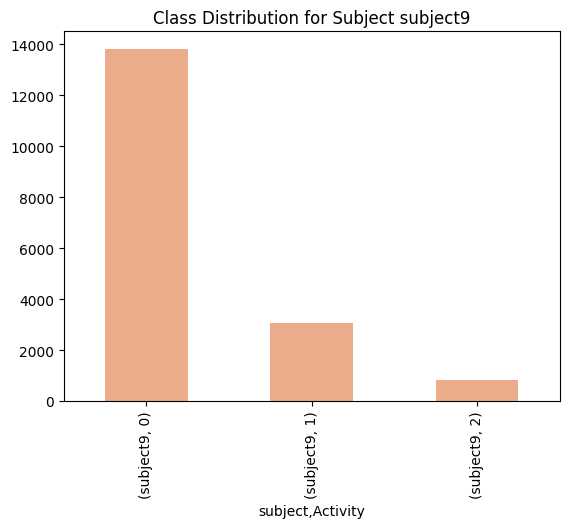

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Activity' is the target variable
class_distribution_per_subject = train_df.groupby('subject')['Activity'].value_counts()

# Display the class distribution for each subject
for subject, distribution in class_distribution_per_subject.groupby(level=0):
    print(f"Subject {subject} Class Distribution:")
    print(distribution)
    print()

    # Optional: Plotting the distribution for each subject
    distribution.plot(kind='bar', title=f'Class Distribution for Subject {subject}')
    plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assuming 'Activity' is the target variable and 'subject' is a column in your DataFrame
X = train_df.drop('Activity', axis=1)  # Features
y = train_df['Activity']  # Target variable

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample each subject separately
X_resampled, y_resampled = [], []

for subject, group in train_df.groupby('subject'):
    X_subject = group.drop('Activity', axis=1)
    y_subject = group['Activity']

    X_subject_resampled, y_subject_resampled = ros.fit_resample(X_subject, y_subject)

    X_resampled.append(X_subject_resampled)
    y_resampled.append(y_subject_resampled)

# Concatenate the resampled data back into a DataFrame
X_resampled = pd.concat(X_resampled)
y_resampled = pd.concat(y_resampled)

# Now, X_resampled and y_resampled have the upsampled data with balanced classes per subject


Subject subject1 Class Distribution after Upsampling:
subject   Activity
subject1  0           126106
          12          126106
          8             3379
          1             3072
          2             3072
          3             3072
          4             3072
          5             3072
          6             3072
          7             3072
          9             3072
          10            3072
          11            3072
Name: Activity, dtype: int64



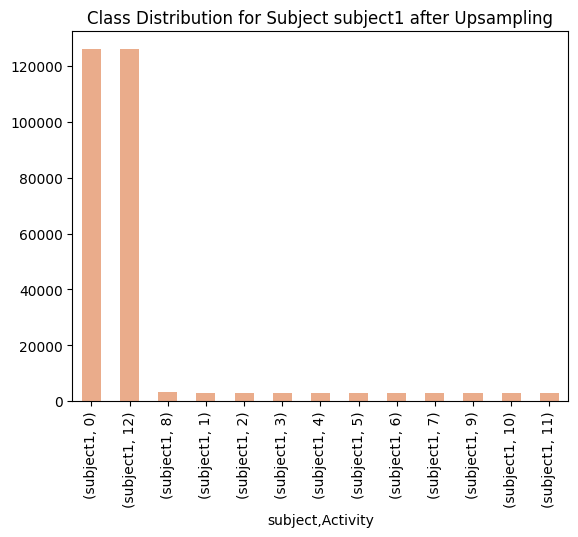

Subject subject3 Class Distribution after Upsampling:
subject   Activity
subject3  0           86732
          12          86732
          7            3379
          6            3226
          8            3175
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
Name: Activity, dtype: int64



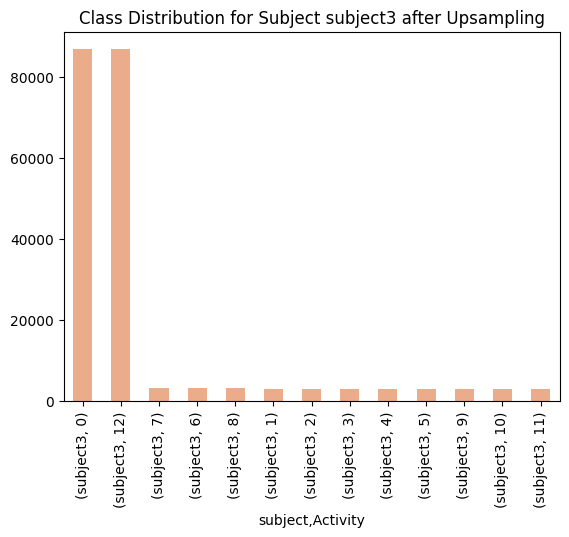

Subject subject4 Class Distribution after Upsampling:
subject   Activity
subject4  0           81408
          12          81408
          6            3328
          7            3277
          8            3123
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
Name: Activity, dtype: int64



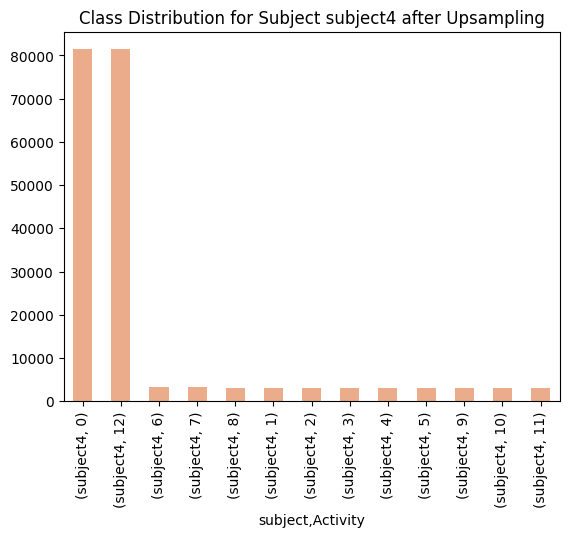

Subject subject5 Class Distribution after Upsampling:
subject   Activity
subject5  0           85861
          12          85861
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
          7            2868
          6            2765
          8            2714
Name: Activity, dtype: int64



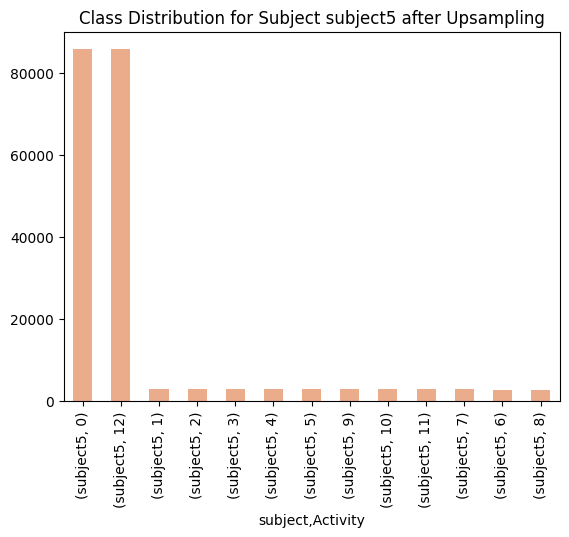

Subject subject6 Class Distribution after Upsampling:
subject   Activity
subject6  0           66099
          12          66099
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          9            3072
          10           3072
          11           3072
          8            2304
          6            2202
          7            2099
Name: Activity, dtype: int64



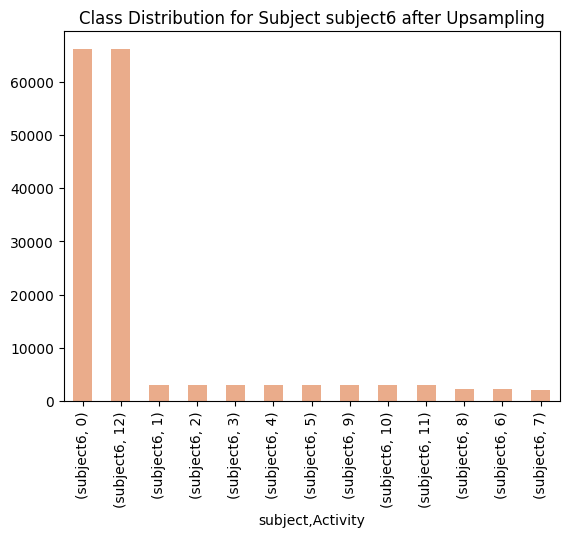

Subject subject7 Class Distribution after Upsampling:
subject   Activity
subject7  0           70195
          12          70195
          1            3072
          2            3072
          3            3072
          4            3072
          5            3072
          6            3072
          9            3072
          10           3072
          11           3072
          8            2816
          7            2765
Name: Activity, dtype: int64



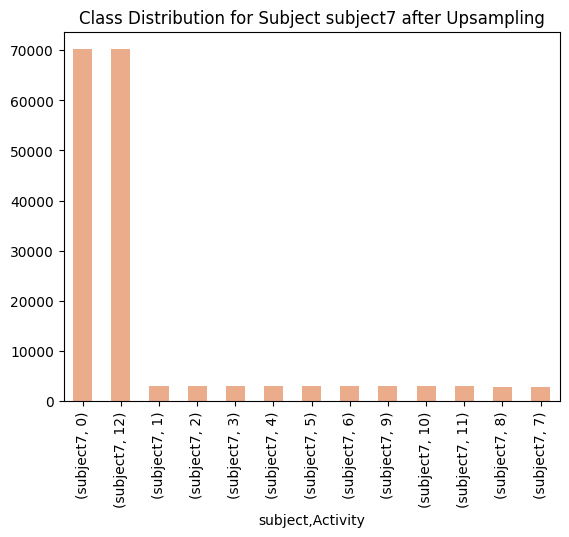

Subject subject9 Class Distribution after Upsampling:
subject   Activity
subject9  0           13824
          2           13824
          1            3072
Name: Activity, dtype: int64



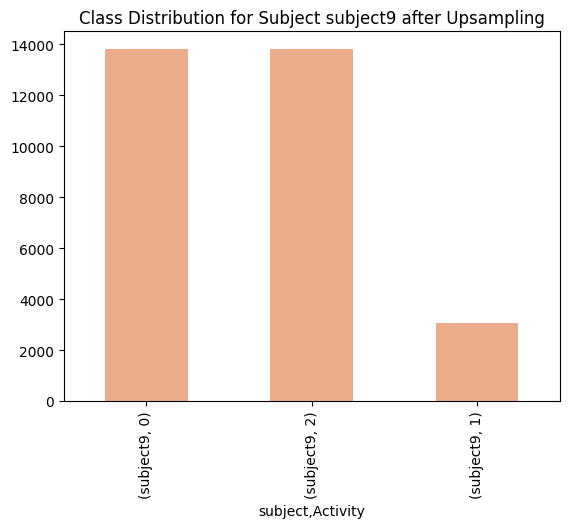

In [ ]:
# Check the class distribution after upsampling by subject
class_distribution_after_upsampling = pd.concat([y_resampled, X_resampled['subject']], axis=1).groupby('subject')['Activity'].value_counts()

# Display the class distribution for each subject
for subject, distribution in class_distribution_after_upsampling.groupby(level=0):
    print(f"Subject {subject} Class Distribution after Upsampling:")
    print(distribution)
    print()

    # Optional: Plotting the distribution for each subject
    distribution.plot(kind='bar', title=f'Class Distribution for Subject {subject} after Upsampling')
    plt.show()

Overall Class Distribution after Upsampling:
0     530225
12    516401
2      32256
1      21504
3      18432
4      18432
9      18432
10     18432
11     18432
5      18432
6      17665
8      17511
7      17460
Name: Activity, dtype: int64


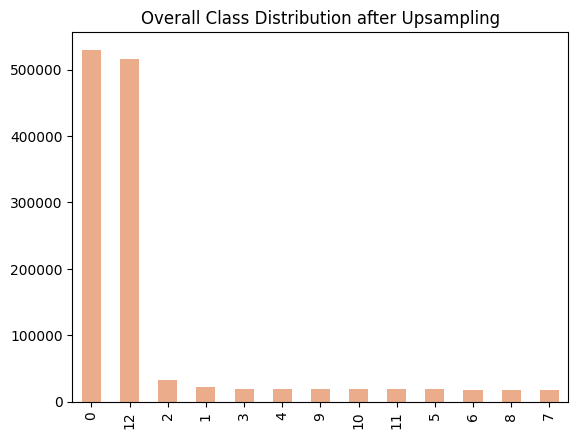

In [ ]:
# Check the overall class distribution after upsampling
overall_class_distribution_after_upsampling = y_resampled.value_counts()

# Display the overall class distribution
print("Overall Class Distribution after Upsampling:")
print(overall_class_distribution_after_upsampling)

# Optional: Plotting the overall distribution
overall_class_distribution_after_upsampling.plot(kind='bar', title='Overall Class Distribution after Upsampling')
plt.show()

In [ ]:
# Addressing Class Imbalance
# Checking the class distribution in the 'Activity' column of the training set

#class_distribution = train_df.groupby('subject').apply(lambda x : x.iloc[-1]['Activity']).value_counts()
#class_distribution

0    6
2    1
dtype: int64

In [ ]:
#train_df[train_df['subject'] == 582840]['Activity']

#len(train_df['subject'].unique())


7

In [ ]:
from sklearn.utils import resample

# Grouping the original training data by 'subject'
grouped_by_patient = train_df.groupby('subject')

# Creating separate lists for each class
groups_class_0 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 0]
groups_class_1 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 1]
groups_class_2 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 2]
groups_class_3 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 3]
groups_class_4 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 4]
groups_class_5 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 5]
groups_class_6 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 6]
groups_class_7 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 7]
groups_class_8 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 8]
groups_class_9 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 9]
groups_class_10 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 10]
groups_class_11 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 11]
groups_class_12 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 12]

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Grouping the original training data by 'subject'
grouped_by_patient = train_df.groupby('subject')

# Creating separate lists for each class
groups_by_class = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups]

# Identify the majority class (assuming it's class 0)
majority_class = 0
target_class_count = len(groups_by_class[majority_class])

# Initialize lists for oversampled groups
oversampled_groups = []

# Oversample each class to match the target class count
for class_idx, group_class in enumerate(groups_by_class):
    # Skip oversampling for the majority class
    if class_idx == majority_class:
        oversampled_groups.append(group_class)
    else:
        # Perform oversampling only if the class has enough samples
        if len(group_class) >= target_class_count:
            oversampled_class = resample(group_class, replace=True, n_samples=target_class_count, random_state=42)
            oversampled_groups.append(oversampled_class)

# Concatenate the oversampled groups into a balanced dataset
train_df_balanced = pd.concat(oversampled_groups, ignore_index=True)

In [ ]:
print(balanced_dataset['Activity'].value_counts())

0     126106
8       3379
1       3072
2       3072
3       3072
4       3072
6       3072
7       3072
9       3072
10      3072
11      3072
5       3072
12      1075
Name: Activity, dtype: int64


In [ ]:
train_df_balanced

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.203950,-0.010298,0.245962,0.261780,-0.608852,-1.041064,-1.093245,0.219993,-0.668404,-0.299446,-1.006306,-0.497150,0,subject1
1,0.255810,0.035775,0.255924,0.223553,-0.603522,-1.033988,-1.088613,0.265791,-0.710112,-0.299446,-1.006306,-0.497150,0,subject1
2,0.261183,0.021272,0.255407,0.223553,-0.603522,-1.033988,-1.063388,0.273344,-0.646057,-0.299446,-1.006306,-0.497150,0,subject1
3,0.203055,0.054795,0.230872,0.223553,-0.603522,-1.033988,-1.088696,0.266412,-0.622734,-0.313706,-1.002527,-0.512845,0,subject1
4,0.263408,0.064854,0.261005,0.223553,-0.603522,-1.033988,-1.103769,0.296625,-0.612630,-0.313706,-1.002527,-0.512845,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161275,0.194075,0.090442,0.556472,-1.782949,-0.933326,1.788853,-0.144584,1.849435,1.110303,-0.673905,1.791249,0.672093,0,subject1
161276,0.176422,0.020222,0.547788,-1.813540,-0.975884,1.757002,-0.231881,1.931439,0.920343,-0.673905,1.791249,0.672093,0,subject1
161277,0.092608,0.083459,0.576952,-1.813540,-0.975884,1.757002,0.040698,1.206413,1.196556,-0.673905,1.791249,0.672093,0,subject1
161278,0.128758,0.078210,0.543812,-1.813540,-0.975884,1.757002,0.481233,0.879454,0.839679,-0.673905,1.791249,0.672093,0,subject1


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'subject' and create sequences
grouped = train_df_balanced.groupby('subject', sort=False)
sequences = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped]
targets = [group['Activity'].iloc[-1] for _, group in grouped]  # Assuming all records for a patient have the same target

# Padding sequences
max_length = max(len(s) for s in sequences)
# We can also go with max_length
padded_sequences = pad_sequences(sequences, maxlen=5, padding='post', dtype='float')

padded_sequences.shape


(1, 5, 12)

In [ ]:
#Testing sequences

# Group by 'Subject' and create sequences
grouped_test = test_df.groupby('subject', sort=False)
sequences_test = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped_test]
targets_test = [group['Activity'].iloc[-1] for _, group in grouped_test]  # Assuming all records for a patient have the same target

# Padding sequences for the test set
padded_sequences_test = pad_sequences(sequences_test, maxlen=5, padding='post', dtype='float')

padded_sequences_test.shape

(2, 5, 12)

In [ ]:
#Snippet for Sequence Generation
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']
def create_sequences(train_df_balanced, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(train_df_balanced) - sequence_length + 1, sequence_length):
        sequence = train_df_balanced[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df_balanced, sequence_length=100)
X_test, y_test = create_sequences(test_data_normalized, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: ignored

In [ ]:
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

def create_sequences_per_subject_activity(train_df_balanced, sequence_length=100):
    sequences = []
    output = []

    # Grouping by 'subject' and 'Activity'
    grouped_data = train_df_balanced.groupby(['subject', 'Activity'])

    for (subject, activity), group in grouped_data:
        # Creating sequences for each group
        for i in range(0, len(group) - sequence_length + 1, sequence_length):
            sequence = group[i:i + sequence_length]
            label = sequence['Activity'].iloc[0]
            sequences.append(sequence[sensor_columns].values)
            output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences_per_subject_activity(train_data_normalized, sequence_length=100)
X_test, y_test = create_sequences_per_subject_activity(test_data_normalized, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

RNN

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 12  # For 12-class classification
epochs = 30
learning_rate = 0.0001
batch_size = 512
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

LTSM with Pytorch

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 12  # For 12-class classification
epochs = 5
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()